# DataJoint U24 - Workflow Miniscope


## Setup


First, let's change directories to find the `dj_local_conf` file.


In [1]:
import os
import numpy as np
import datajoint as dj

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
dj.config["custom"]["database.prefix"] = "u24_mini_"

Next, we populate the python namespace with the required schemas


In [2]:
from workflow_miniscope.pipeline import miniscope, QualityMetricFigs

[2023-01-10 11:28:51,513][WARNING]: lab.Project and related tables will be removed in a future version of Element Lab. Please use the project schema.
[2023-01-10 11:28:56,262][INFO]: Connecting cbroz@dss-db.datajoint.io:3306
[2023-01-10 11:28:56,711][INFO]: Connected cbroz@dss-db.datajoint.io:3306


## Visualizations

CaImAn produces a few metrics for estimates. These can be visualized as follows.


Available plots: ['r_values', 'SNR', 'cnn_preds']


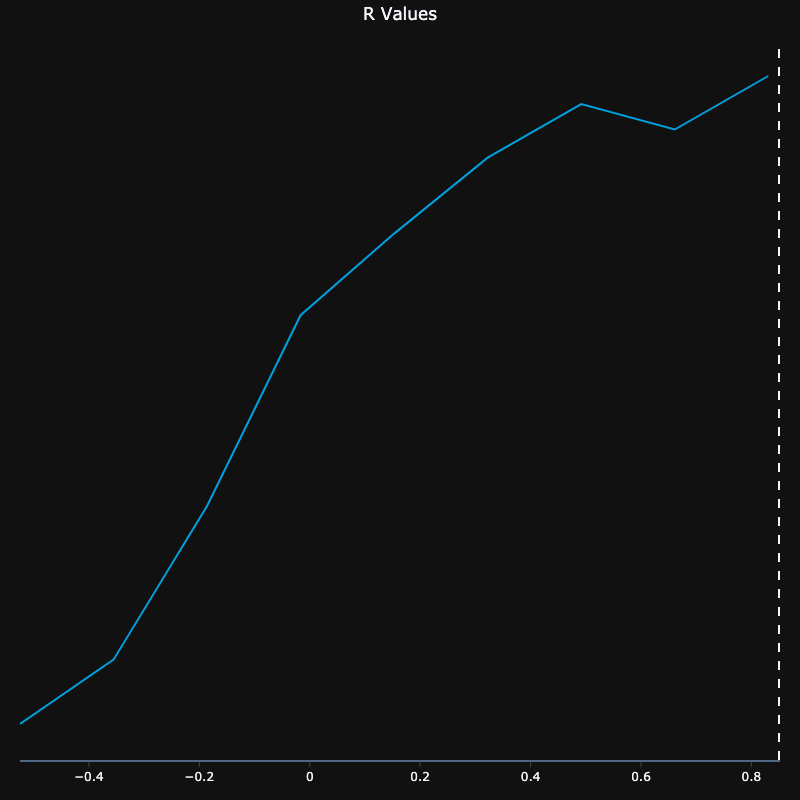

In [3]:
key = miniscope.Curation.fetch("KEY", limit=1)[0]
qm = QualityMetricFigs(miniscope, key, dark_mode=True)
print("Available plots:", qm.plot_list)
fig = qm.get_single_fig("r_values")
fig.show(
    "png"
)  # .show('png') is optional. Here, it is used to render the image within a notebook that is embedded in a browser.qm.get_grid()

A number of metrics are available from CaImAn estimates.

In [4]:
import inspect

[
    i[0]
    for i in inspect.getmembers(qm.estimates)  # see all available class attributes
    if not i[0].startswith("_") and not inspect.ismethod(i[1])  # filter out functions
]

['A',
 'A_thr',
 'Ab',
 'Ab_dense',
 'AtA',
 'AtY_buf',
 'C',
 'CC',
 'CY',
 'C_on',
 'Cf',
 'Cn',
 'F_dff',
 'OASISinstances',
 'R',
 'S',
 'SNR_comp',
 'W',
 'YrA',
 'Yr_buf',
 'b',
 'b0',
 'bl',
 'c1',
 'center',
 'cnn_preds',
 'coordinates',
 'dims',
 'discarded_components',
 'ecc',
 'f',
 'g',
 'groups',
 'idx_components',
 'idx_components_bad',
 'ind_new',
 'lam',
 'merged_ROIs',
 'mn',
 'neurons_sn',
 'noisyC',
 'nr',
 'psx',
 'r_values',
 'rho_buf',
 'shifts',
 'sn',
 'sv',
 'vr']

 We can adjust which we visualize using the following syntax.

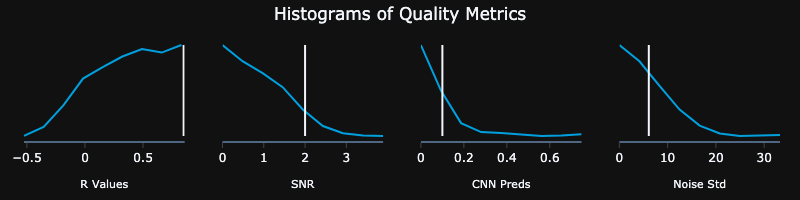

In [5]:
qm.component_list = ["r_values", "SNR_comp", "cnn_preds", "neurons_sn"]
noise = qm.components.neurons_sn
qm.plots = {
    "neurons_sn": {
        "xaxis": "Noise Std",
        "data": qm.components.neurons_sn,
        "bins": np.linspace(min(noise), max(noise), 10),
        "vline": noise.mean(),
    }
}
fig = qm.get_grid(n_columns=4)
fig.show("png")

In [6]:
qm.components

,r_values,SNR_comp,cnn_preds,neurons_sn
0,0.500398,1.863260,0.045389,5.313188
1,0.568861,1.033131,0.031540,8.824791
2,0.226204,0.618304,0.012997,9.883841
3,0.599668,1.234195,0.025490,8.781350
4,0.000000,0.000000,0.000000,0.042582
...,...,...,...,...
108,0.652990,1.495659,0.000519,13.064044
109,0.765022,1.498043,0.001978,7.738464
110,0.803198,0.420331,0.002988,10.223336
111,0.588237,1.763111,0.033076,8.086799
